# WORLD HAPPINESS

## Introduction
The World Happiness Report is a publication of the United Nations Sustainable Development Solutions Network. It ranks countries according to their happiness levels, based on 6 factors, including GDP per capita, life expectancy, social support, freedom to make life choices, generosity, and perceptions of corruption.

The purpose of this project is to conduct a data analysis of the World Happiness Report data. The goal is to identify how happiness changed over time, the factors that are most important for happiness and to explore the relationships between these factors.

The data includes information from approximately 150 countries for the years 2015-2023.

Flow of analysis:
1. Import data
2. Data preprocess
3. EDA

  3.1 How happiness scores evolved over time

  3.2 The most influential factors contributing to happiness, and the intricate relationships between these factors

  3.3 Compare the top-ranked and bottom-ranked countries by each factor

  3.4 Combine the Covid-19 dataset to identify the relationship between the Happiness score and the Covid-19 situation of countries

4. Summary
5. Recommendation

## 1.Import data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df_2015 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/6. Final/WHR2015.csv')
df_2016 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/6. Final/WHR2016.csv')
df_2017 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/6. Final/WHR2017.csv')
df_2018 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/6. Final/WHR2018.csv')
df_2019 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/6. Final/WHR2019.csv')
df_2020 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/6. Final/WHR2020.csv')
df_2021 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/6. Final/WHR2021.csv')
df_2022 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/6. Final/WHR2022.csv')
df_2023 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/6. Final/WHR2023.csv')

Mounted at /content/drive


## 2.Preprocess
* Check for duplicated and NaN values
* Drop unnecessary columns
* Rename columns
* Reindex columns
* Replace the names of values in the necessary columns
* Add `Happiness Rank` columns to missing dataframe
* Add `year` columns
Apply all the above processes to the nine-year datasets

### 2015

In [ ]:
# df_2015.head()
# df_2015.info()

print(df_2015.shape)

df_2015 = df_2015.drop(columns=['Standard Error','Dystopia Residual'])

df_2015 = df_2015.rename(columns = {'Economy (GDP per Capita)': 'GDP per Capita', 'Family': 'Social Support',
                                    'Health (Life Expectancy)': 'Life Expectancy', 'Trust (Government Corruption)': 'Government Corruption'})

df_2015 = df_2015.reindex(columns=['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'GDP per Capita', 'Social Support',
                   'Life Expectancy', 'Freedom', 'Generosity', 'Government Corruption'])

(158, 12)


In [ ]:
# df_2015.duplicated().sum() =0
# df_2015.isna().sum() =0

# sorted(df_2015['Country'].unique())
df_2015['Country'] = df_2015['Country'].replace({'Hong Kong':'Hong Kong S.A.R. of China','Macedonia': 'North Macedonia',
                                                 'Somaliland region': 'Somaliland Region','Swaziland':'Eswatini',
                                                 'Taiwan':'Taiwan Province of China'})

# sorted(df_2015['Region'].unique())
df_2015['Region'] = df_2015['Region'].replace({'Australia and New Zealand':'North America and ANZ','Eastern Asia':'East Asia',
                                               'Middle East and Northern Africa':'Middle East and North Africa',
                                               'North America':'North America and ANZ','Southeastern Asia':'Southeast Asia','Southern Asia':'South Asia'})

df_2015['Year'] = 2015

### 2016

In [ ]:
# df_2016.head()
# df_2016.info()

print(df_2016.shape)

df_2016 = df_2016.drop(columns=['Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'])

df_2016 = df_2016.rename(columns = {'Economy (GDP per Capita)': 'GDP per Capita', 'Family': 'Social Support',
                                    'Health (Life Expectancy)': 'Life Expectancy', 'Trust (Government Corruption)': 'Government Corruption'})

df_2016 = df_2016.reindex(columns=['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'GDP per Capita', 'Social Support',
                   'Life Expectancy', 'Freedom', 'Generosity', 'Government Corruption'])

(157, 13)


In [ ]:
# df_2016.duplicated().sum() =0
# df_2016.isna().sum() =0

# sorted(df_2016['Country'].unique())
df_2016['Country'] = df_2016['Country'].replace({'Hong Kong':'Hong Kong S.A.R. of China','Macedonia':'North Macedonia',
                                                 'Taiwan':'Taiwan Province of China'})

# sorted(df_2016['Region'].unique())
df_2016['Region'] = df_2016['Region'].replace({'Australia and New Zealand':'North America and ANZ','Eastern Asia':'East Asia',
                                               'Middle East and Northern Africa':'Middle East and North Africa',
                                               'North America':'North America and ANZ','Southeastern Asia':'Southeast Asia','Southern Asia':'South Asia'})

df_2016['Year'] = 2016

### 2017

In [ ]:
# df_2017.head()
# df_2017.info()

print(df_2017.shape)

df_2017 = df_2017.drop(columns=['Whisker.high', 'Whisker.low' ,'Dystopia.Residual'])

df_2017 = df_2017.rename(columns = {'Happiness.Rank':'Happiness Rank', 'Happiness.Score': 'Happiness Score',
                                    'Economy..GDP.per.Capita.':'GDP per Capita', 'Family':'Social Support',
                                    'Health..Life.Expectancy.':'Life Expectancy','Trust..Government.Corruption.':'Government Corruption'})

(155, 12)


In [ ]:
# df_2017.duplicated().sum() =0
# df_2017.isna().sum() =0

# sorted(df_2017['Country'].unique())
df_2017['Country'] = df_2017['Country'].replace({'Hong Kong S.A.R., China':'Hong Kong S.A.R. of China','Macedonia':'North Macedonia'})

df_2017['Year'] = 2017

### 2018

In [ ]:
# df_2018.head()
# df_2018.info()

print(df_2018.shape)

df_2018 = df_2018.rename(columns = {'Overall rank':'Happiness Rank', 'Country or region': 'Country', 'Score': 'Happiness Score',
                                    'GDP per capita': 'GDP per Capita', 'Social support': 'Social Support', 'Healthy life expectancy':'Life Expectancy',
                                    'Freedom to make life choices': 'Freedom', 'Perceptions of corruption':'Government Corruption'})

# df_2018.duplicated().sum() =0

(156, 9)


In [ ]:
df_2018.isna().sum()

Happiness Rank           0
Country                  0
Happiness Score          0
GDP per Capita           0
Social Support           0
Life Expectancy          0
Freedom                  0
Generosity               0
Government Corruption    1
dtype: int64

In [ ]:
# There is a NaN value this year; fill the NaN value after processing all nine-year datasets
df_2018.loc[df_2018['Government Corruption'].isna()]

,Happiness Rank,Country,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Generosity,Government Corruption
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


In [ ]:
# sorted(df_2018['Country'].unique())
df_2018['Country'] = df_2018['Country'].replace({'Hong Kong':'Hong Kong S.A.R. of China','Northern Cyprus':'North Cyprus',
                                                 'Macedonia':'North Macedonia','Taiwan':'Taiwan Province of China',
                                                 'Trinidad & Tobago':'Trinidad and Tobago'})

df_2018['Year'] = 2018

### 2019

In [ ]:
# df_2019.head()
# df_2019.info()

print(df_2019.shape)

df_2019 = df_2019.rename(columns = {'Overall rank':'Happiness Rank', 'Country or region': 'Country', 'Score': 'Happiness Score',
                                    'GDP per capita': 'GDP per Capita', 'Social support': 'Social Support', 'Healthy life expectancy':'Life Expectancy',
                                    'Freedom to make life choices': 'Freedom', 'Perceptions of corruption':'Government Corruption'})



(156, 9)


In [ ]:
# df_2019.duplicated().sum() =0
# df_2019.isna().sum() =0

# sorted(df_2019['Country'].unique())
df_2019['Country'] = df_2019['Country'].replace({'Hong Kong':'Hong Kong S.A.R. of China','Northern Cyprus':'North Cyprus','Swaziland':'Eswatini',
                                                 'Taiwan':'Taiwan Province of China','Trinidad & Tobago':'Trinidad and Tobago'})

df_2019['Year'] = 2019

### 2020

In [ ]:
# df_2020.head()
# df_2020.info()

print(df_2020.shape)

df_2020 = df_2020.drop(columns=['Standard error of ladder score', 'upperwhisker' , 'lowerwhisker', 'Logged GDP per capita', 'Social support',
                                'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption',
                                'Ladder score in Dystopia', 'Dystopia + residual'])

df_2020 = df_2020.rename(columns = {'Country name': 'Country', 'Regional indicator': 'Region', 'Ladder score': 'Happiness Score',
                                    'Explained by: Log GDP per capita': 'GDP per Capita', 'Explained by: Social support': 'Social Support',
                                    'Explained by: Healthy life expectancy':'Life Expectancy', 'Explained by: Freedom to make life choices': 'Freedom',
                                    'Explained by: Generosity': 'Generosity', 'Explained by: Perceptions of corruption':'Government Corruption'})

(153, 20)


In [ ]:
# df_2020.duplicated().sum() =0
# df_2020.isna().sum() =0

# sorted(df_2020['Country'].unique())
df_2020['Country'] = df_2020['Country'].replace({'Macedonia':'North Macedonia','Swaziland':'Eswatini'})

# sorted(df_2020['Region'].unique())
df_2020['Region'] = df_2020['Region'].replace('Commonwealth of Independent States','Central and Eastern Europe')

df_2020['Happiness Rank'] = df_2020['Happiness Score'].rank(ascending=False).astype('int64')

df_2020 = df_2020.reindex(columns=['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'GDP per Capita', 'Social Support',
                   'Life Expectancy', 'Freedom', 'Generosity', 'Government Corruption'])

df_2020['Year'] = 2020

### 2021

In [ ]:
# df_2021.head()
# df_2021.info()

print(df_2021.shape)

df_2021 = df_2021.drop(columns=['Standard error of ladder score', 'upperwhisker' , 'lowerwhisker', 'Logged GDP per capita', 'Social support',
                                'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption',
                                'Ladder score in Dystopia', 'Dystopia + residual'])

df_2021 = df_2021.rename(columns = {'Country name': 'Country', 'Regional indicator': 'Region', 'Ladder score': 'Happiness Score',
                                    'Explained by: Log GDP per capita': 'GDP per Capita', 'Explained by: Social support': 'Social Support',
                                    'Explained by: Healthy life expectancy':'Life Expectancy', 'Explained by: Freedom to make life choices': 'Freedom',
                                    'Explained by: Generosity': 'Generosity', 'Explained by: Perceptions of corruption':'Government Corruption'})

(149, 20)


In [ ]:
# df_2021.duplicated().sum() =0
# df_2021.isna().sum() =0

# sorted(df_2021['Country'].unique())
df_2021['Country'] = df_2021['Country'].replace({'Swaziland':'Eswatini'})

# sorted(df_2021['Region'].unique())
df_2021['Region'] = df_2021['Region'].replace('Commonwealth of Independent States','Central and Eastern Europe')

df_2021['Happiness Rank'] = df_2021['Happiness Score'].rank(ascending=False).astype('int64')

df_2021 = df_2021.reindex(columns=['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'GDP per Capita', 'Social Support',
                   'Life Expectancy', 'Freedom', 'Generosity', 'Government Corruption'])

df_2021['Year'] = 2021

### 2022

In [ ]:
# df_2022.head()
# df_2022.info()

print(df_2022.shape)

df_2022 = df_2022.drop(columns=['Whisker-high', 'Whisker-low', 'Dystopia (1.83) + residual'])

df_2022 = df_2022.rename(columns = {'RANK': 'Happiness Rank', 'Happiness score': 'Happiness Score',
                                    'Explained by: GDP per capita': 'GDP per Capita', 'Explained by: Social support': 'Social Support',
                                    'Explained by: Healthy life expectancy':'Life Expectancy', 'Explained by: Freedom to make life choices': 'Freedom',
                                    'Explained by: Generosity': 'Generosity', 'Explained by: Perceptions of corruption':'Government Corruption'})

(147, 12)


In [ ]:
# df_2022.duplicated().sum() =0
df_2022.isna().sum()

Happiness Rank           0
Country                  0
Happiness Score          1
GDP per Capita           1
Social Support           1
Life Expectancy          1
Freedom                  1
Generosity               1
Government Corruption    1
dtype: int64

In [ ]:
# df_2022.loc[df_2022['Happiness Score'].isna()]
# There is a NaN value this year, drop NaN value as there is no data in this row
df_2022 = df_2022.dropna()
# Check again: df_2022.isna().sum() =0

In [ ]:
# Some country names have '*', so strip these '*'
df_2022['Country'] = df_2022['Country'].str.strip('*')

# sorted(df_2022['Country'].unique())
df_2022['Country'] = df_2022['Country'].replace({'Congo':'Congo (Brazzaville)','Czechia':'Czech Republic','Eswatini, Kingdom of':'Eswatini'})

df_2022['Year'] = 2022

<ipython-input-22-c55d36fa6f60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['Country'] = df_2022['Country'].str.strip('*')
<ipython-input-22-c55d36fa6f60>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['Country'] = df_2022['Country'].replace({'Congo':'Congo (Brazzaville)','Czechia':'Czech Republic','Eswatini, Kingdom of':'Eswatini'})
<ipython-input-22-c55d36fa6f60>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

### 2023

In [ ]:
# df_2023.head()
# df_2023.info()

print(df_2023.shape)

df_2023 = df_2023.drop(columns=['Standard error of ladder score', 'upperwhisker' , 'lowerwhisker', 'Logged GDP per capita', 'Social support',
                                'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption',
                                'Ladder score in Dystopia', 'Dystopia + residual'])

df_2023 = df_2023.rename(columns = {'Country name': 'Country', 'Regional indicator': 'Region', 'Ladder score': 'Happiness Score',
                                    'Explained by: Log GDP per capita': 'GDP per Capita', 'Explained by: Social support': 'Social Support',
                                    'Explained by: Healthy life expectancy':'Life Expectancy', 'Explained by: Freedom to make life choices': 'Freedom',
                                    'Explained by: Generosity': 'Generosity', 'Explained by: Perceptions of corruption':'Government Corruption'})

(137, 19)


In [ ]:
# df_2023.duplicated().sum() =0
df_2023.isna().sum()

Country                  0
Happiness Score          0
GDP per Capita           0
Social Support           0
Life Expectancy          1
Freedom                  0
Generosity               0
Government Corruption    0
dtype: int64

In [ ]:
# There is a NaN value this year; fill the NaN value after processing all nine-year datasets
df_2023.loc[df_2023['Life Expectancy'].isna()]

,Country,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Generosity,Government Corruption
98,State of Palestine,4.908,1.144,1.309,NaN,0.416,0.065,0.067


In [ ]:
# sorted(df_2023['Country'].unique())
df_2023['Country'] = df_2023['Country'].replace({'Czechia':'Czech Republic','State of Palestine':'Palestinian Territories',
                                                 'Turkiye':'Turkey'})

df_2023['Happiness Rank'] = df_2023['Happiness Score'].rank(ascending=False).astype('int64')

df_2023['Year'] = 2023

### Additional process
* Add `Region` columns to missing year datasets
* Reindex columns for the year dataset that has not been reindexed before

In [ ]:
# Create a region-country dictionary: 2015, 2016, 2020, 2021 have info about the region
region_dict1 = {df_2015['Country'][i]: df_2015['Region'][i] for i in range(len(df_2015))}
region_dict2 = {df_2016['Country'][j]: df_2016['Region'][j] for j in range(len(df_2016))}
region_dict3 = {df_2020['Country'][k]: df_2020['Region'][k] for k in range(len(df_2020))}
region_dict4 = {df_2021['Country'][l]: df_2021['Region'][l] for l in range(len(df_2021))}
merged_dict = {**region_dict1, **region_dict2, **region_dict3, **region_dict4}

In [ ]:
# Create 'Region' columns for the year datasets that do not have them
for df in [df_2017, df_2018, df_2019, df_2022, df_2023]:
  df['Region'] = df['Country'].apply(lambda x: merged_dict.get(x))

<ipython-input-28-3da7bac88d8a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Region'] = df['Country'].apply(lambda x: merged_dict.get(x))


In [ ]:
# Check again: isna(): 2017, 2019, 2022 = 0; 2018 = 1 (Government Corruption), 2023 = 1(Life Expectancy)

In [ ]:
# Reindex columns for the year dataset that has not been reindexed before
for df in [df_2017, df_2018, df_2019, df_2022, df_2023]:
  df = df.reindex(columns=['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'GDP per Capita', 'Social Support',
                   'Life Expectancy', 'Freedom', 'Generosity', 'Government Corruption', 'Year'])

### Concatenate

In [ ]:
# Concatenate all nine-year datasets into one dataset
df_happiness = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023], axis=0)

In [ ]:
# df_happiness.head()
# df_happiness.info()
# df_happiness.duplicated().sum() =0
# Check NaN value again
df_happiness.isna().sum()

Country                  0
Region                   0
Happiness Rank           0
Happiness Score          0
GDP per Capita           0
Social Support           0
Life Expectancy          1
Freedom                  0
Generosity               0
Government Corruption    1
Year                     0
dtype: int64

In [ ]:
# df_happiness.loc[df_happiness['Country'] == 'United Arab Emirates']
# df_happiness.loc[df_happiness['Country'] == 'Palestinian Territories']

# Fill NaN values with the average count for each column
df_happiness['Government Corruption'] = df_happiness['Government Corruption'].fillna(round(df_happiness.loc[df_happiness['Country'] == 'United Arab Emirates', 'Government Corruption'].mean(),6))

df_happiness['Life Expectancy'] = df_happiness['Life Expectancy'].fillna(round(df_happiness.loc[df_happiness['Country'] == 'Palestinian Territories', 'Life Expectancy'].mean(),6))

In [ ]:
# Check again: df_happiness.isna().sum() =0

## 3.Exploratory Data Analysis

### 3.1 How happiness scores evolved over time

In [ ]:
# The average Happiness Score of the World
happiness_global = df_happiness.groupby('Country')['Happiness Score'].mean().reset_index()

import plotly.express as px

fig = px.choropleth(happiness_global, color='Happiness Score', locations='Country', locationmode='country names', projection='natural earth',
              scope='world')

fig.show()

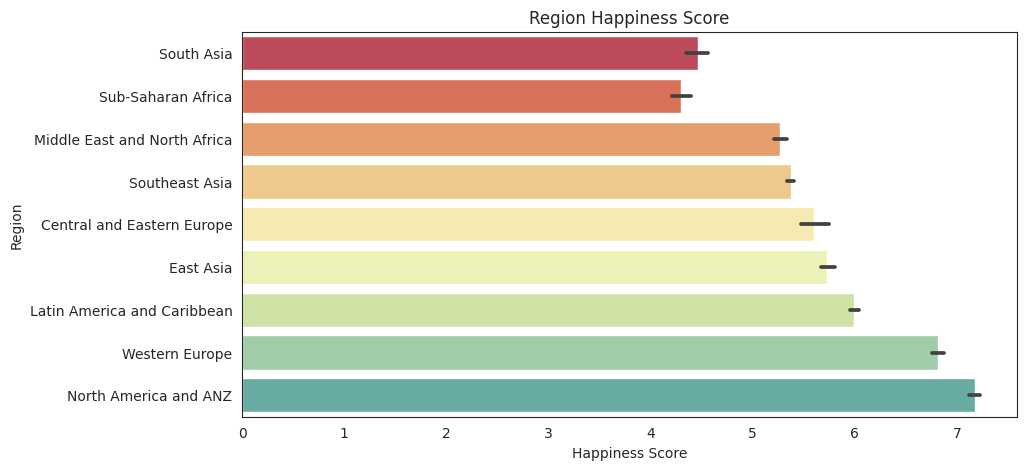

In [ ]:
# The average Happiness Score for each region
happiness_region = df_happiness.groupby(['Region','Year'])['Happiness Score'].mean().reset_index().sort_values(by="Happiness Score")
plt.figure(figsize=(10, 5))
sns.set_style('white')
sns.set_palette('Spectral', 10)
bar_plot = sns.barplot(data=happiness_region, x="Happiness Score", y="Region")
plt.title("Region Happiness Score")

bar_fig =bar_plot.get_figure()
bar_fig.savefig('Region Happiness Score.png')

**Conclusion 1:**

The map and chart above illustrate the average happiness scores of countries and regions from 2015 to 2023. They provide an overview of global happiness, with most African and South Asia nations having the lowest scores, while North America, Australia and New Zealand, and Western Europe nations having the highest scores.
Additionally, there are significant regional variations.

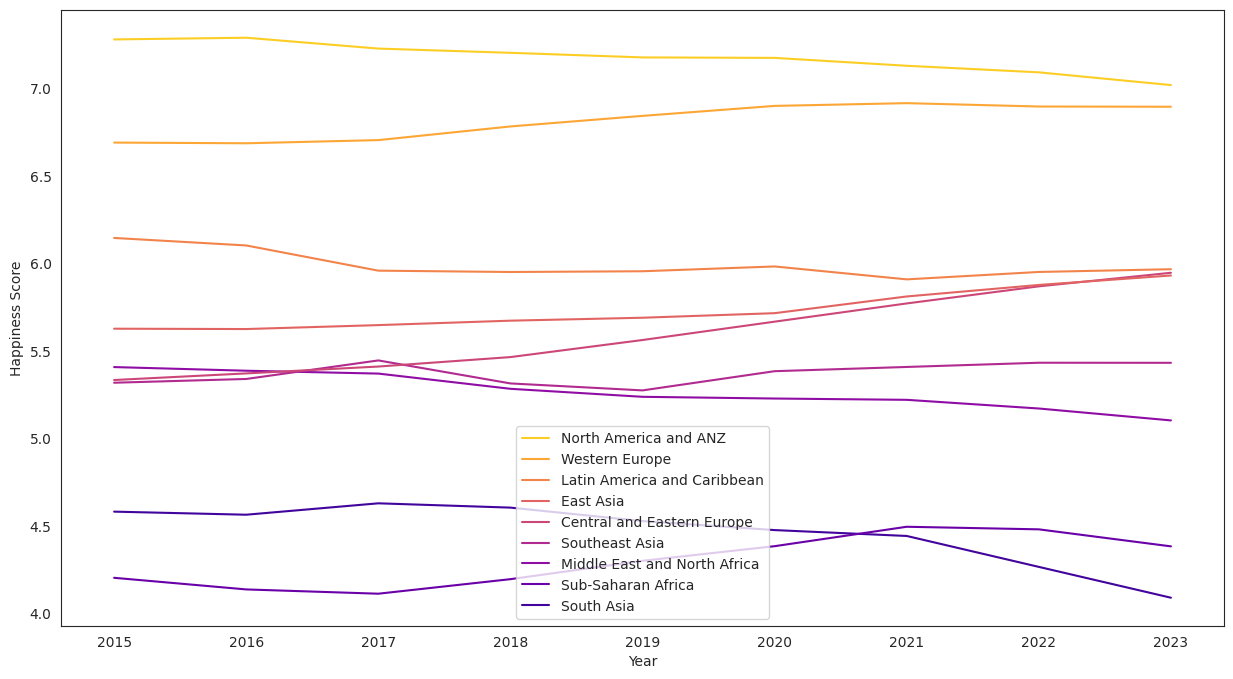

In [ ]:
# How happiness changed over time
plt.figure(figsize=(15, 8))

sns.set_style('white')
line_plot = sns.lineplot(data=happiness_region, x="Year", y="Happiness Score", hue="Region", palette='plasma')
plt.legend(reverse=True)
# plt.title("Happiness Score over time for each Region")

line_fig = line_plot.get_figure()
line_fig.savefig('Happiness Score over time for each Region.png')

**Conclusion 2:**

The chart shows that happiness scores in most regions remained stable until 2020, but then declined slightly, with significant decreases in South Asia, and the Middle East and North Africa. Sub-Saharan Africa had a slight increase before 2021, but then also declined. However, happiness scores in Europe and East Asia increased slightly. These trends highlight the significant regional differences in happiness.

### 3.2 The most influential factors contributing to happiness, and the intricate relationships between these factors

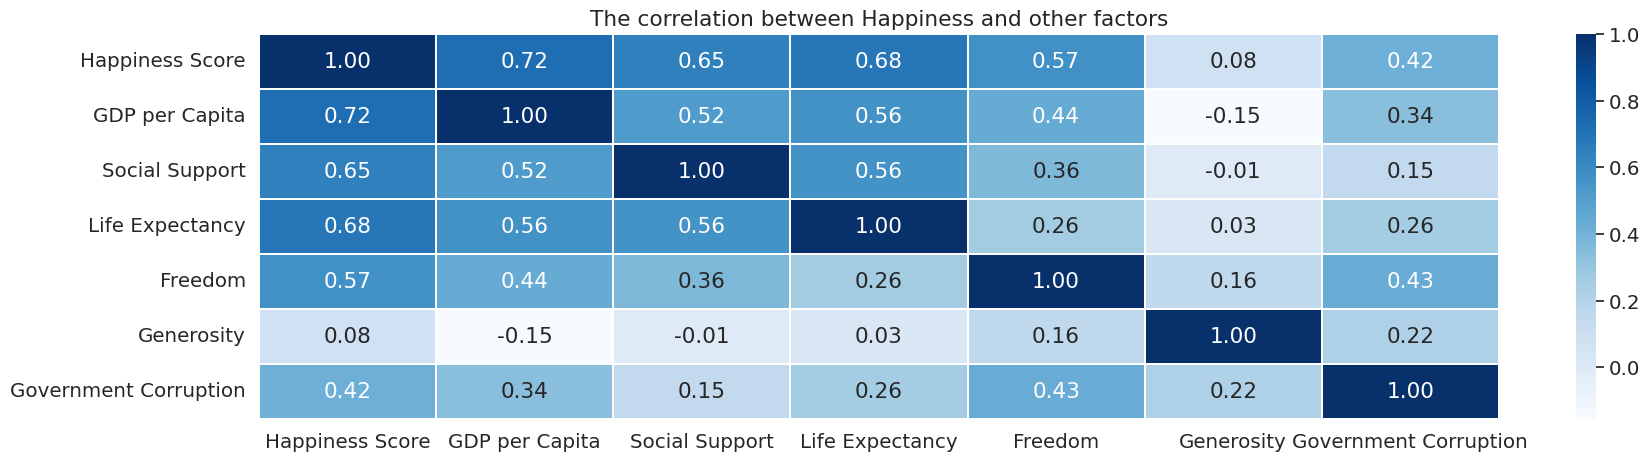

In [ ]:
# The relationships between happiness and other factors
num = df_happiness[["Happiness Score", "GDP per Capita", "Social Support", "Life Expectancy", "Freedom", "Generosity", "Government Corruption"]]
# num.corr().style.background_gradient(cmap="Blues")

plt.figure(figsize = (20, 5))
sns.set(font_scale=1.3)
map_plot = sns.heatmap(data=num.corr(), cmap="Blues", annot=True, fmt=".2f", linewidth = .15);
plt.title("The correlation between Happiness and other factors")

map_fig = map_plot.get_figure()
map_fig.savefig('The correlation between Happiness and other factors.png')

**Conclusion 3:**

The above chart shows that the GDP per capita of the nation is highly correlated with Happiness Score, and Life Expectancy and Social support also have a significant correlation with Happiness Scores.

### 3.3 Compare the top-ranked and bottom-ranked countries by each factor

In [ ]:
# Differences by each factor between different groups

# Filter top 5 countries
top_happiness = df_happiness[df_happiness['Happiness Rank'] < 11]['Country'].value_counts().head().index
top_5 = df_happiness[df_happiness['Country'].isin(top_happiness)]

# Filter bottom 5 countries
df_grouped = df_happiness.groupby('Year')
bottom_happiness = df_grouped.apply(lambda x: x.sort_values('Happiness Rank', ascending=True).iloc[-10:]['Country']).value_counts().head().index
bottom_5 = df_happiness[df_happiness['Country'].isin(bottom_happiness)]

In [ ]:
# Create a new dataframe that contains the values of each factor for each group of countries
top5_factors = top_5[["GDP per Capita", "Social Support", "Life Expectancy", "Freedom", "Generosity", "Government Corruption"]].mean().round(2).reset_index()
top5_factors['Group'] = 'Top countries'

bottom5_factors = bottom_5[["GDP per Capita", "Social Support", "Life Expectancy", "Freedom", "Generosity", "Government Corruption"]].mean().round(2).reset_index()
bottom5_factors['Group'] = 'Bottom countries'

factors = pd.concat([top5_factors, bottom5_factors], axis=0).rename(columns = {'index':'Factor', 0: 'Value'})

In [ ]:
top_happiness

Index(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Finland'], dtype='object')

In [ ]:
bottom_happiness

Index(['Tanzania', 'Rwanda', 'Afghanistan', 'Malawi', 'Yemen'], dtype='object')

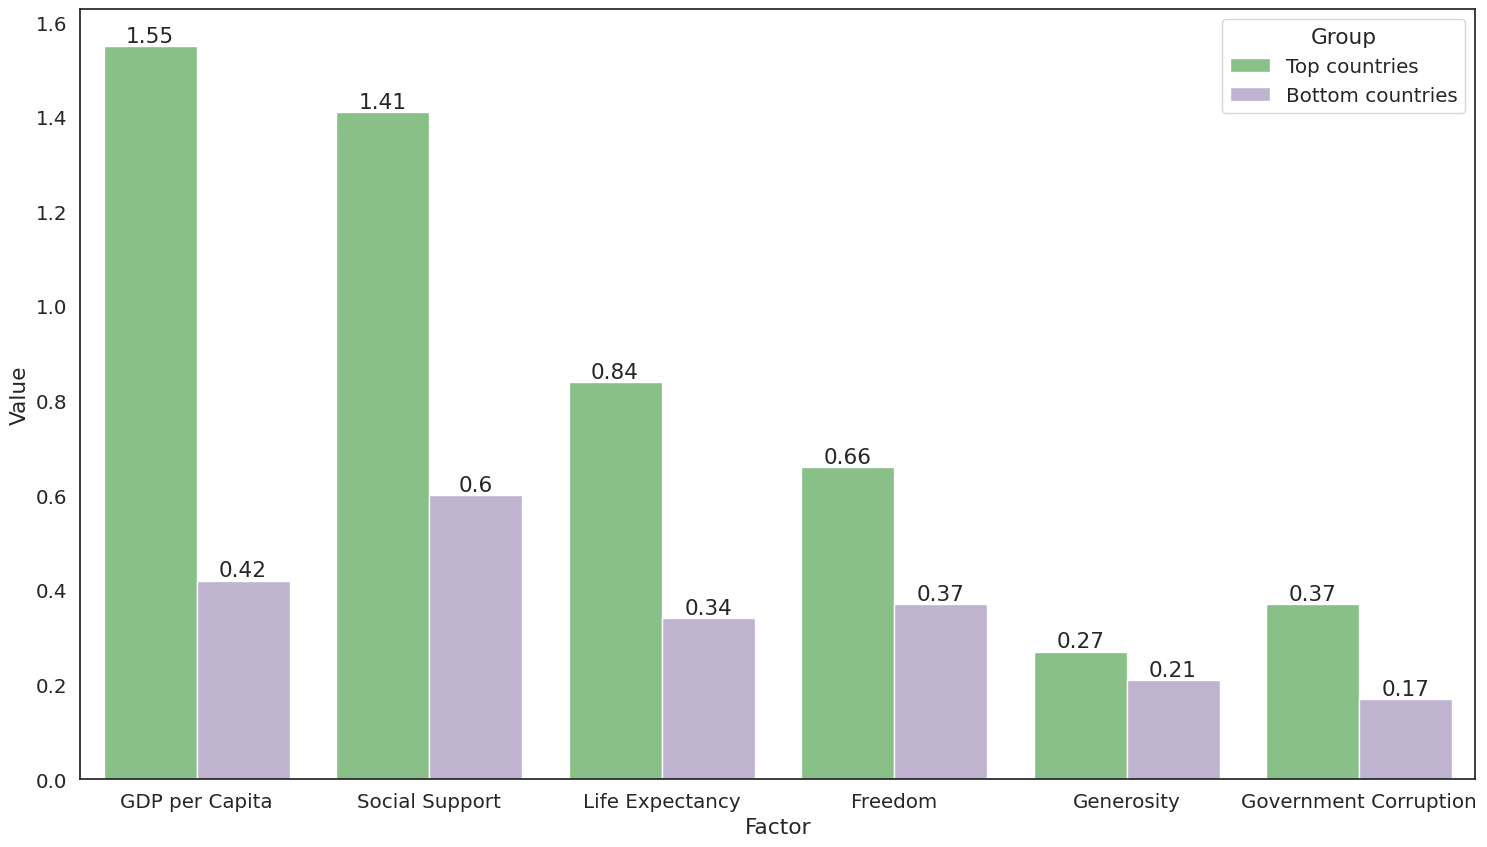

In [ ]:
plt.figure(figsize=(18, 10))

sns.set_style('white')
bar2_plot = sns.barplot(data=factors, x="Factor", y="Value", hue="Group", palette='Accent')
# plt.title("Differences between top countries and bottom countries")

for i in bar2_plot.containers:
    bar2_plot.bar_label(i,)

bar2_fig =bar2_plot.get_figure()
bar2_fig.savefig('Differences between top countries and bottom countries.png')

**Conclusion 4:**

The chart clearly demonstrates that there are large disparities between the two groups of countries.
Especially, the top-ranked countries have the highest values for GDP per capita, Social Support, and Life Expectancy, and they are twice as high as the bottom-ranked countries.


### 3.4 Combine the COVID-19 dataset

In [ ]:
# Covid-19 situation data source: https://covid19.who.int/data (WHO 03/01/2020 - 20/09/2023)
data_covid = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WHO-COVID-19-global-data.csv')

# World population data source: https://population.un.org/wpp/Download/Standard/CSV/ (United Nations until 2022)
data_population = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WPP2022.csv')

<ipython-input-44-42b0ae1d4299>:5: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
# data_covid.info()

data_covid = data_covid[['Date_reported','Country','Cumulative_cases','Cumulative_deaths']]

data_covid['Country'] = data_covid['Country'].replace({'Bolivia (Plurinational State of)':'Bolivia','Congo':'Congo (Brazzaville)',
                                                   'Democratic Republic of the Congo':'Congo (Kinshasa)','Côte d’Ivoire':'Ivory Coast',
                                                   'Czechia':'Czech Republic','Iran (Islamic Republic of)':'Iran',"Lao People's Democratic Republic":'Laos',
                                                   'Kosovo[1]':'Kosovo','occupied Palestinian territory, including east Jerusalem':'Palestinian Territories',
                                                   'Republic of Korea':'South Korea','Republic of Moldova':'Moldova','Russian Federation':'Russia',
                                                   'Syrian Arab Republic':'Syria','Türkiye':'Turkey','The United Kingdom':'United Kingdom',
                                                   'United Republic of Tanzania':'Tanzania','United States of America':'United States',
                                                   'Venezuela (Bolivarian Republic of)':'Venezuela','Viet Nam':'Vietnam'})

df_covid = data_covid.groupby('Country')['Cumulative_cases','Cumulative_deaths'].max().reset_index()

df_covid = df_covid[df_covid['Country'].isin(merged_dict.keys())]

<ipython-input-45-2f85ba276798>:14: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
# df_population.info()

df_population = data_population.loc[data_population['Time']==2022][['Location','TPopulation1July']]

df_population = df_population.rename(columns = {'Location': 'Country', 'TPopulation1July': 'Population(thousands)'})
df_population['Country'] = df_population['Country'].replace({'Bolivia (Plurinational State of)':'Bolivia','Congo':'Congo (Brazzaville)',"Côte d'Ivoire":'Ivory Coast',
                                                             'Democratic Republic of the Congo':'Congo (Kinshasa)','Czechia':'Czech Republic','Iran (Islamic Republic of)':'Iran',
                                                             "Lao People's Democratic Republic":'Laos','Kosovo (under UNSC res. 1244)':'Kosovo',
                                                             'China, Hong Kong SAR':'Hong Kong S.A.R. of China','Republic of Korea':'South Korea',
                                                             'Republic of Moldova':'Moldova','Russian Federation':'Russia','Syrian Arab Republic':'Syria',
                                                             'Türkiye':'Turkey','The United Kingdom':'United Kingdom','China, Taiwan Province of China':'Taiwan Province of China',
                                                             'United Republic of Tanzania':'Tanzania','United States of America':'United States',
                                                             'Venezuela (Bolivarian Republic of)':'Venezuela','Viet Nam':'Vietnam'})

df_population = df_population[df_population['Country'].isin(merged_dict.keys())]

In [ ]:
# Create a new data frame containing the countries in the world happiness data
merge_data = (happiness_global
                .merge(df_covid, on = ['Country'], how = 'left')
                .merge(df_population, on = ['Country'], how = 'left'))

# Create 2 new columns
merge_data['Covid_infection_rates'] = merge_data['Cumulative_cases']/(merge_data['Population(thousands)']*1000)

merge_data['Covid_death_rates'] = (merge_data['Cumulative_deaths']/merge_data['Cumulative_cases'])

merge_data.isna().sum()
merge_data = merge_data.dropna()
# merge_data.head()

In [ ]:
# COVID-19 infection rate
fig1 = px.choropleth(merge_data, color='Covid_infection_rates', locations='Country', locationmode='country names', projection='natural earth',
              scope='world')

fig1.show()

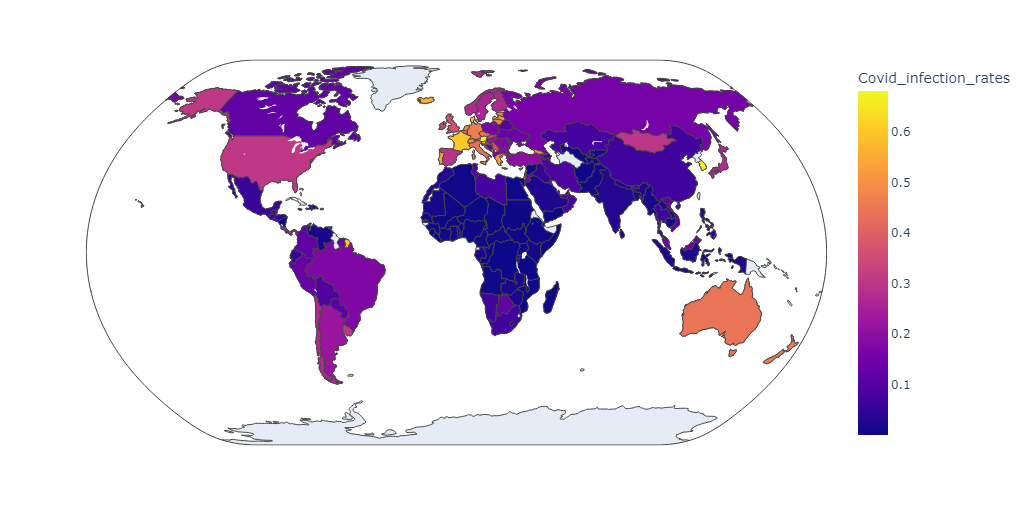

In [ ]:
# COVID-19 death rate
fig2 = px.choropleth(merge_data, color='Covid_death_rates', locations='Country', locationmode='country names', projection='natural earth',
              scope='world')

fig2.show()

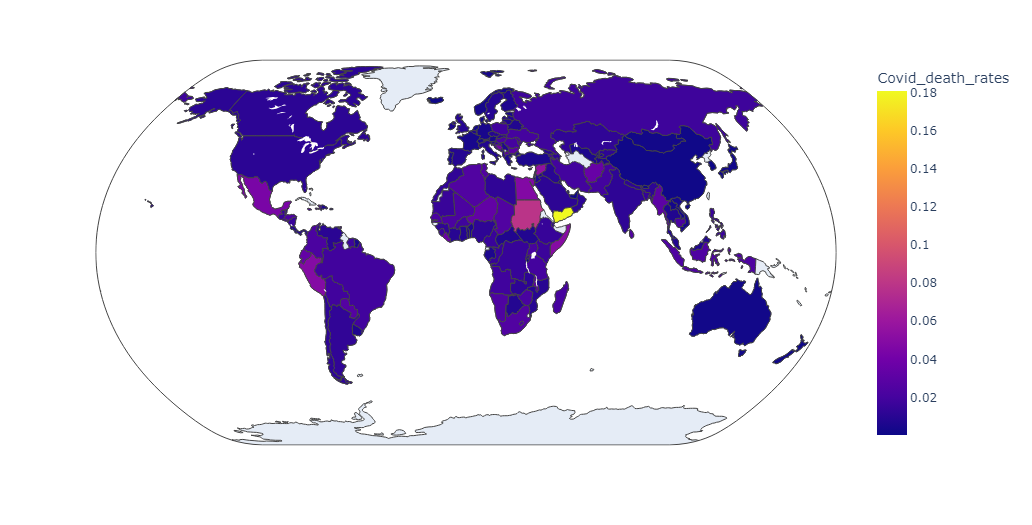

**Conclusion 5:**

According to the map, countries with high happiness scores may have higher COVID-19 infection rates than countries with low happiness scores.
And the COVID-19 death rates in different countries vary, but the variation is not as great as the variation in infection rates.

## 4.Summary

*   The happiness scores of countries have remained relatively stable until 2020, but then declined slightly.
*   Developed countries consistently top the charts, while poor and underdeveloped countries tend to rank at the bottom.
*   GDP per Capita, Life expectancy and Social support are highly correlated with Happiness scores.
*   There remains a large gap between the top and bottom countries.
*   Countries with high happiness scores may have higher COVID-19 infection rates than countries with low happiness scores.








## 5.Recommendation

Based on the findings of this study, the following recommendations can be made:

*   Governments should:

    Focus on policies that promote economic growth.

    Invest in health care and education.

    Strengthen social support networks.

    Fight corruption.

*   Individuals should:

    Focus on building strong social relationships.

    Take care of their physical and mental health.

    Find ways to give back to their community.
